##  Tensor

In [4]:
import torch
#给定三行两列矩阵，显示矩阵的元素和大小
a = torch.Tensor([[2,3],[4,8],[7,9]])
#print('a is : {}'.format(a))
print(format(a))
#print('a size is {}'.format(a.size())) # a.size()=3,2
print(format(a.size()))

tensor([[2., 3.],
        [4., 8.],
        [7., 9.]])
torch.Size([3, 2])


In [5]:
# torch.Tensor 默认是FloatTensor的类型；定义想要的数据类型
b = torch.LongTensor([[2,3],[4,8],[7,9]])
print(format(b))

tensor([[2, 3],
        [4, 8],
        [7, 9]])


In [6]:
# 创建一个全是0的空tensor
c = torch.zeros((3,2))
print(format(c))
# 取一个正态分布作为初始值
d = torch.randn((3,2))
print(format(d))

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[-1.4273, -1.4438],
        [-1.9325,  0.1297],
        [ 1.6585,  1.3385]])


In [7]:
# 改变指定值，比如将a的第一行第二列改为100
a[0,1] = 100
print(format(a))

tensor([[  2., 100.],
        [  4.,   8.],
        [  7.,   9.]])


In [8]:
# 在Tensor与ndarray之间进行相互转换
numpy_b = b.numpy()
print(format(numpy_b))

[[2 3]
 [4 8]
 [7 9]]


In [12]:
import numpy as np
e = np.array([[2,3],[4,5]])
torch_e = torch.from_numpy(e)
print(format(torch_e))
f_torch_e = torch_e.float()
print(f_torch_e)
short_torch_e =torch_e.short()
print(short_torch_e)

tensor([[2, 3],
        [4, 5]])
tensor([[2., 3.],
        [4., 5.]])
tensor([[2, 3],
        [4, 5]], dtype=torch.int16)


In [17]:
# 把tensor a放到GPU上
if torch.cuda.is_available():
    # 如果前面的显卡在用，没有显存，就指定其他显卡
    a_cuda = a.cuda(3)
    print(a_cuda)

tensor([[  2., 100.],
        [  4.,   8.],
        [  7.,   9.]], device='cuda:3')


## Variable

In [19]:
import torch
from torch.autograd import Variable
# creat Variable
x = Variable(torch.Tensor([1]),requires_grad=True)
w = Variable(torch.Tensor([2]),requires_grad=True)
b = Variable(torch.Tensor([3]),requires_grad=True)
# build a computationnal graph
y = w * x + b # y = 2*x+3
# compute gradients
y.backward() # same as y.backward(troch.FloatTensor([1]))
#print gradients
print(x.grad)
print(w.grad)
print(b.grad)

tensor([2.])
tensor([1.])
tensor([1.])


In [22]:
# 上述是对标量的求导；同时也可以对矩阵求导
x = torch.randn(3)
x = Variable(x,requires_grad=True)

y = x*2
print(y)

y.backward(torch.FloatTensor([1,0.1,00.1]))
# 不能不传入参数，否则会报错，上面程序的意思就是得到的梯度为在它原本梯度的基础上分别乘以1,0.1,0.01
#y.backward() 
print(x.grad)

tensor([ 3.2152,  1.0286, -1.5388], grad_fn=<MulBackward0>)
tensor([2.0000, 0.2000, 0.2000])


## Dataset

In [24]:
# 定义数据类
from torch.utils.data import Dataset
class myDataset(Dataset):
    def __init__(self,csv_file,txt_file,root_dir,other_file):
        self.csv_data = pd.read_csv(csv_file)
        with open(txt_file,'r') as f:
            data_list = f.readlines()
        self.txt_data = data_list
        self.root_dir = root_dir
        
    def __len__(self):
        return len(self.csv_data)
    
    def __getitem__(self,idx):
        data = (self.csv_data[idx],self.txt_data[idx])
        return data 

In [30]:
# DataLoader 多线程读取数据，取batch
from torch.utils.data import DataLoader
# collate_fn表示如何取样本的
# dataiter = DataLoader(myDataset,batch_size=32,shuffle=True,collate_fn=default_collate)
#处理图片
# transform 图片增强，loader 读取方法
# dset = ImageFolder(root='root_patch',transform=None,loader=default_loader)

## nn.Module（模组）

In [33]:
# 所有层结构和损失函数都来自torch.nn ;所有模型构建都从基类nn.Module继承的
from torch import nn
class net_name(nn.Module):
    def __init__(self, other_arguments):
        super(net_name,self).__init__()
        self.conv1 = nn.Conv2d(in_channels,out_channels,kernel_size)
        # other network layer
    def forward(self,x):
        x = self.conv1(x)
        return x
    
    

In [35]:
# 定义损失函数，均方误差、多分类的交叉熵、二分类的交叉熵
criterion = nn.CrossEntropyLoss()
# 输出和真实目标之间的损失
# loss = criterion(output, target)


## torch.optim（优化）


In [37]:
from torch import optim
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.01,momentum=0.9)

## 模型的保存和加载 torch.save

In [ ]:
#保存整个模型的结构信息和参数信息,保存到对象是模型model
torch.save(model,'./model.pth')
# 保存模型的参数,保存到对象是模型的状态model.state_dict()
torch.save(model.state_dict(),'./model_state.pth')

In [ ]:
#加载完整的模型结构和参数信息
load_model = torch.load('./model.pth')
#加载模型参数信息，先导入模型的结构
model.load_state_dict(torch.load('model_state.pth'))

# 线性模型

## 一维线性回归

In [38]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

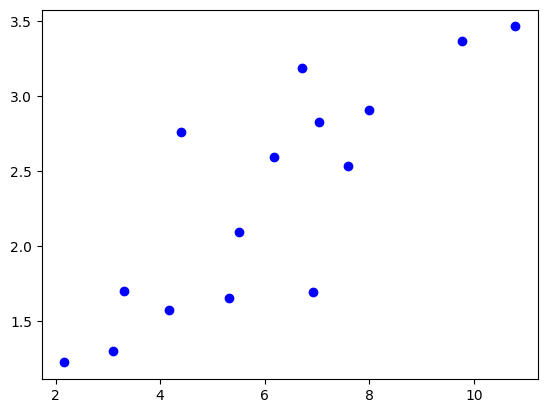

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# 'bo'蓝色圆点
plt.plot(x_train,y_train,'bo')
plt.show()

In [42]:
# 需要找一条直线去逼近这些点
# 首先需要先将 numpy.array转换成Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

In [44]:
# 建立模型
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(1,1) #输入输出都是一维
        
    def forward(self,x):
        out = self.linear(x)
        return out
    
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()


In [48]:
# 定义损失函数和优化函数，使用均方误差作为优化函数，使用梯度下降
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=1e-3)

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x_train).cuda()
        target = Variable(y_train).cuda()
    else:
        inputs = Variable(x_train)
        target = Variable(y_train)
    # forward
    out = model(inputs)
    loss = criterion(out,target)
    # backward 在优化之前将梯度归零
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 参数更新
    optimizer.step()
    
    #if (epoch+1)%20 == 0:
        # loss 是一个Variable，所以通过loss.data取出一个Tensor,在通过loss.data[0]得到一个int或者float的数据
        #print('Epoch[{}/{}],loss:{:.6f}'.format(epoch+1,num_epochs,loss.data[0]))
    # loss.data[0]报错invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.it，所以替换成loss.item()
    print('Epoch[{}/{}],loss:{:.6f}'.format(epoch+1,num_epochs,loss.item()))
    

Epoch[1/10],loss:8.369356
Epoch[2/10],loss:7.029809
Epoch[3/10],loss:5.911718
Epoch[4/10],loss:4.978471
Epoch[5/10],loss:4.199507
Epoch[6/10],loss:3.549319
Epoch[7/10],loss:3.006617
Epoch[8/10],loss:2.553630
Epoch[9/10],loss:2.175527
Epoch[10/10],loss:1.859926


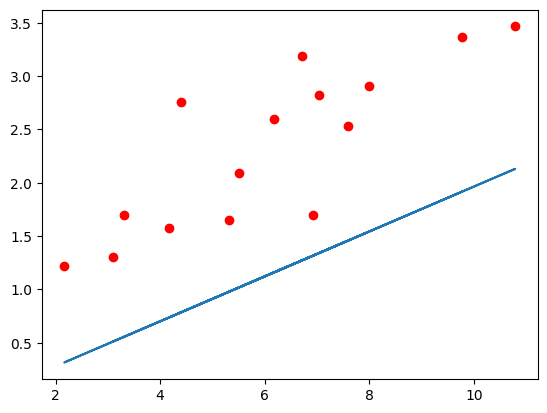

In [51]:
# 预测结果
# 将模型变成预测模式
model.eval()
model.cpu()
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='original data')
# plt.plot(x_train.numpy(),predict,'bo',label='fitting line')
plt.plot(x_train.numpy(),predict,label='fitting line')
plt.show()
#10个epoch肯定预测不好，要多设置epoch才行

## 多项式回归


In [146]:
# 首先需要预处理数据，将数据变成一个矩阵的形式
# 使用 torch.cat()函数来实现Tensor的拼接
def make_features(x):
    #建立特征，例如，一个矩阵有三列 x,x^2,x^3
    # unsqueeze(1)是将原来的tensor大小由3变成(3,1)
    x = x.unsqueeze(1)
    # 1代表行拼接，0代表列拼接
    return torch.cat([x ** i for i in range(1,4)],1)

In [147]:
#定义真实的函数
w_target = torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)
b_target = torch.FloatTensor([0.9])

def f(x):
    #矩阵乘法
    return x.mm(w_target) + b_target[0]

In [148]:
# 随机采样一些点进行训练
def get_batch(batch_size=32):
    #建立一个batch 例如 (x,f(x)) 取batch_size个数据
    random = torch.randn(batch_size)
    # 将其转换为矩阵的格式
    x = make_features(random)
    # 把上面的值通过函数后的结果返回作为真实的目标
    y = f(x)
    if torch.cuda.is_available():
        return Variable(x).cuda(0),Variable(y).cuda(0)
    else:
        return Variable(x),Variable(y)

In [149]:
# 定义多项式模型
class poly_model(nn.Module):
    def __init__(self):
        super(poly_model,self).__init__()
        # 输入是3维，输出是1维
        self.poly = nn.Linear(3,1)
        
    def forward(self,x):
        out = self.poly(x)
        return out
        
if torch.cuda.is_available():
    model = poly_model().cuda(0)
else:
    model = poly_model()

In [150]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=1e-3)

In [151]:
epoch = 0
while True:
    # get data
    batch_x,batch_y = get_batch()
    #forward 
    output = model(batch_x)
    loss = criterion(output,batch_y)
    print_loss = loss.item()
    # 梯度归零
    optimizer.zero_grad()
    #backward
    loss.backward()
    #更新参数
    optimizer.step()
    epoch += 1
    print('Epoch[{}/{}],loss:{:.6f}'.format(epoch,num_epochs,loss.item()))
    if print_loss < 1e-3:
        break

Epoch[1/10],loss:141.966629
Epoch[2/10],loss:22.171818
Epoch[3/10],loss:208.165848
Epoch[4/10],loss:62.640263
Epoch[5/10],loss:138.366165
Epoch[6/10],loss:18.124752
Epoch[7/10],loss:58.128468
Epoch[8/10],loss:132.690063
Epoch[9/10],loss:62.527313
Epoch[10/10],loss:61.003975
Epoch[11/10],loss:62.715698
Epoch[12/10],loss:93.466949
Epoch[13/10],loss:154.325989
Epoch[14/10],loss:38.018883
Epoch[15/10],loss:71.193932
Epoch[16/10],loss:20.911743
Epoch[17/10],loss:16.084749
Epoch[18/10],loss:9.312767
Epoch[19/10],loss:47.099915
Epoch[20/10],loss:60.112862
Epoch[21/10],loss:72.535645
Epoch[22/10],loss:18.766052
Epoch[23/10],loss:21.946285
Epoch[24/10],loss:23.603279
Epoch[25/10],loss:16.618668
Epoch[26/10],loss:65.360146
Epoch[27/10],loss:17.698071
Epoch[28/10],loss:7.602969
Epoch[29/10],loss:28.973289
Epoch[30/10],loss:21.234348
Epoch[31/10],loss:20.966570
Epoch[32/10],loss:90.618591
Epoch[33/10],loss:23.400482
Epoch[34/10],loss:13.462624
Epoch[35/10],loss:27.644073
Epoch[36/10],loss:9.081835

Epoch[367/10],loss:0.468362
Epoch[368/10],loss:0.089384
Epoch[369/10],loss:0.120595
Epoch[370/10],loss:0.670217
Epoch[371/10],loss:0.114177
Epoch[372/10],loss:0.088849
Epoch[373/10],loss:0.222014
Epoch[374/10],loss:0.197141
Epoch[375/10],loss:0.294114
Epoch[376/10],loss:0.266252
Epoch[377/10],loss:0.289696
Epoch[378/10],loss:0.102579
Epoch[379/10],loss:0.320187
Epoch[380/10],loss:0.086614
Epoch[381/10],loss:0.404702
Epoch[382/10],loss:0.207693
Epoch[383/10],loss:0.361962
Epoch[384/10],loss:0.597162
Epoch[385/10],loss:0.285775
Epoch[386/10],loss:0.255645
Epoch[387/10],loss:0.161788
Epoch[388/10],loss:0.662843
Epoch[389/10],loss:0.290377
Epoch[390/10],loss:0.128042
Epoch[391/10],loss:0.110152
Epoch[392/10],loss:0.399287
Epoch[393/10],loss:0.332046
Epoch[394/10],loss:0.211071
Epoch[395/10],loss:0.154580
Epoch[396/10],loss:0.128482
Epoch[397/10],loss:0.096167
Epoch[398/10],loss:0.113132
Epoch[399/10],loss:0.127245
Epoch[400/10],loss:0.080427
Epoch[401/10],loss:0.360560
Epoch[402/10],loss:0

Epoch[668/10],loss:0.050720
Epoch[669/10],loss:0.079863
Epoch[670/10],loss:0.064262
Epoch[671/10],loss:0.064826
Epoch[672/10],loss:0.050641
Epoch[673/10],loss:0.074162
Epoch[674/10],loss:0.048586
Epoch[675/10],loss:0.050194
Epoch[676/10],loss:0.051204
Epoch[677/10],loss:0.055501
Epoch[678/10],loss:0.062596
Epoch[679/10],loss:0.070370
Epoch[680/10],loss:0.058863
Epoch[681/10],loss:0.048263
Epoch[682/10],loss:0.055057
Epoch[683/10],loss:0.065936
Epoch[684/10],loss:0.051012
Epoch[685/10],loss:0.044956
Epoch[686/10],loss:0.043485
Epoch[687/10],loss:0.050046
Epoch[688/10],loss:0.045441
Epoch[689/10],loss:0.060902
Epoch[690/10],loss:0.048630
Epoch[691/10],loss:0.051106
Epoch[692/10],loss:0.056092
Epoch[693/10],loss:0.049250
Epoch[694/10],loss:0.044559
Epoch[695/10],loss:0.072968
Epoch[696/10],loss:0.053032
Epoch[697/10],loss:0.045894
Epoch[698/10],loss:0.042283
Epoch[699/10],loss:0.090581
Epoch[700/10],loss:0.043808
Epoch[701/10],loss:0.038018
Epoch[702/10],loss:0.043103
Epoch[703/10],loss:0

Epoch[991/10],loss:0.022704
Epoch[992/10],loss:0.026548
Epoch[993/10],loss:0.028073
Epoch[994/10],loss:0.030618
Epoch[995/10],loss:0.020621
Epoch[996/10],loss:0.046991
Epoch[997/10],loss:0.024672
Epoch[998/10],loss:0.030237
Epoch[999/10],loss:0.095776
Epoch[1000/10],loss:0.026688
Epoch[1001/10],loss:0.024611
Epoch[1002/10],loss:0.028286
Epoch[1003/10],loss:0.026835
Epoch[1004/10],loss:0.026028
Epoch[1005/10],loss:0.038736
Epoch[1006/10],loss:0.028321
Epoch[1007/10],loss:0.022090
Epoch[1008/10],loss:0.035780
Epoch[1009/10],loss:0.021845
Epoch[1010/10],loss:0.023213
Epoch[1011/10],loss:0.155993
Epoch[1012/10],loss:0.023151
Epoch[1013/10],loss:0.020459
Epoch[1014/10],loss:0.029343
Epoch[1015/10],loss:0.035970
Epoch[1016/10],loss:0.018147
Epoch[1017/10],loss:0.023316
Epoch[1018/10],loss:0.027767
Epoch[1019/10],loss:0.024272
Epoch[1020/10],loss:0.027063
Epoch[1021/10],loss:0.025018
Epoch[1022/10],loss:0.040807
Epoch[1023/10],loss:0.024841
Epoch[1024/10],loss:0.023502
Epoch[1025/10],loss:0.0

Epoch[1347/10],loss:0.009420
Epoch[1348/10],loss:0.020039
Epoch[1349/10],loss:0.017722
Epoch[1350/10],loss:0.011733
Epoch[1351/10],loss:0.012782
Epoch[1352/10],loss:0.010959
Epoch[1353/10],loss:0.011549
Epoch[1354/10],loss:0.012154
Epoch[1355/10],loss:0.010583
Epoch[1356/10],loss:0.009993
Epoch[1357/10],loss:0.014103
Epoch[1358/10],loss:0.010995
Epoch[1359/10],loss:0.011149
Epoch[1360/10],loss:0.012067
Epoch[1361/10],loss:0.011980
Epoch[1362/10],loss:0.011551
Epoch[1363/10],loss:0.010645
Epoch[1364/10],loss:0.009726
Epoch[1365/10],loss:0.010291
Epoch[1366/10],loss:0.010709
Epoch[1367/10],loss:0.009861
Epoch[1368/10],loss:0.011442
Epoch[1369/10],loss:0.011839
Epoch[1370/10],loss:0.013241
Epoch[1371/10],loss:0.009513
Epoch[1372/10],loss:0.009988
Epoch[1373/10],loss:0.033007
Epoch[1374/10],loss:0.009557
Epoch[1375/10],loss:0.012170
Epoch[1376/10],loss:0.012867
Epoch[1377/10],loss:0.009832
Epoch[1378/10],loss:0.011996
Epoch[1379/10],loss:0.011355
Epoch[1380/10],loss:0.017532
Epoch[1381/10]

Epoch[1632/10],loss:0.005603
Epoch[1633/10],loss:0.007333
Epoch[1634/10],loss:0.004460
Epoch[1635/10],loss:0.005811
Epoch[1636/10],loss:0.006086
Epoch[1637/10],loss:0.005963
Epoch[1638/10],loss:0.006897
Epoch[1639/10],loss:0.006158
Epoch[1640/10],loss:0.005945
Epoch[1641/10],loss:0.006200
Epoch[1642/10],loss:0.004880
Epoch[1643/10],loss:0.006205
Epoch[1644/10],loss:0.004772
Epoch[1645/10],loss:0.006283
Epoch[1646/10],loss:0.006760
Epoch[1647/10],loss:0.005206
Epoch[1648/10],loss:0.006104
Epoch[1649/10],loss:0.006843
Epoch[1650/10],loss:0.006270
Epoch[1651/10],loss:0.004603
Epoch[1652/10],loss:0.005637
Epoch[1653/10],loss:0.006398
Epoch[1654/10],loss:0.004743
Epoch[1655/10],loss:0.004576
Epoch[1656/10],loss:0.005404
Epoch[1657/10],loss:0.006269
Epoch[1658/10],loss:0.005434
Epoch[1659/10],loss:0.005453
Epoch[1660/10],loss:0.005830
Epoch[1661/10],loss:0.004708
Epoch[1662/10],loss:0.004972
Epoch[1663/10],loss:0.004999
Epoch[1664/10],loss:0.004880
Epoch[1665/10],loss:0.005199
Epoch[1666/10]

Epoch[2006/10],loss:0.002211
Epoch[2007/10],loss:0.002850
Epoch[2008/10],loss:0.002049
Epoch[2009/10],loss:0.002216
Epoch[2010/10],loss:0.008507
Epoch[2011/10],loss:0.002308
Epoch[2012/10],loss:0.002572
Epoch[2013/10],loss:0.002294
Epoch[2014/10],loss:0.001826
Epoch[2015/10],loss:0.002524
Epoch[2016/10],loss:0.002388
Epoch[2017/10],loss:0.002573
Epoch[2018/10],loss:0.002753
Epoch[2019/10],loss:0.002345
Epoch[2020/10],loss:0.002341
Epoch[2021/10],loss:0.003304
Epoch[2022/10],loss:0.003248
Epoch[2023/10],loss:0.002504
Epoch[2024/10],loss:0.002424
Epoch[2025/10],loss:0.002329
Epoch[2026/10],loss:0.002802
Epoch[2027/10],loss:0.002358
Epoch[2028/10],loss:0.005241
Epoch[2029/10],loss:0.002356
Epoch[2030/10],loss:0.002585
Epoch[2031/10],loss:0.002447
Epoch[2032/10],loss:0.002194
Epoch[2033/10],loss:0.003233
Epoch[2034/10],loss:0.002953
Epoch[2035/10],loss:0.002416
Epoch[2036/10],loss:0.002907
Epoch[2037/10],loss:0.003917
Epoch[2038/10],loss:0.002269
Epoch[2039/10],loss:0.002194
Epoch[2040/10]

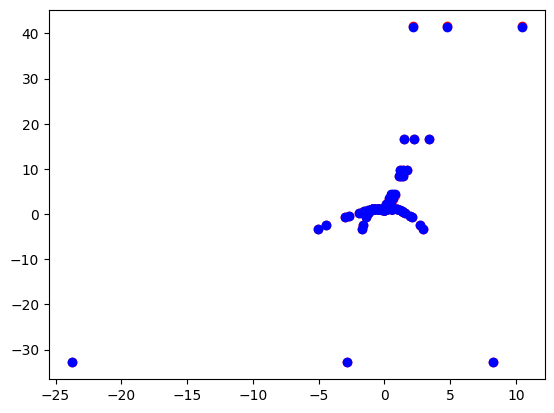

In [173]:
# 预测结果
# 将模型变成预测模式
model.eval()
# 将模型移到cpu
model.cpu()
# 得先把Variable形式的数据转换为Tensor形式，Variable(batch_x).data，然后才能移到cpu上，转换成后面的numpy
batch_x = Variable(batch_x).data.cpu()
batch_y = Variable(batch_y).data.cpu()

predict = model(batch_x)

predict = predict.data.numpy()

 
    

plt.plot(batch_x.numpy(),batch_y.numpy(),'ro',label='original data')

plt.plot(batch_x.numpy(),predict,'bo',label='fitting line')
plt.show()

# 分类问题


## Logistic回归的代码实现

In [205]:
# 读取数据  x y label
with open('./data/data.txt','r') as f:
    data_list = f.readlines()
    # 以回车分每一行
    data_list = [i.split('\n')[0] for i in data_list]
    # 以逗号划分
    data_list = [i.split(',') for i in data_list]
    data = [(float(i[0]),float(i[1]),float(i[2])) for i in data_list]
    
# 标准化
x0_max = max([i[0] for i in data])
x1_max = max([i[1] for i in data])
data = [(i[0]/x0_max, i[1]/x1_max, i[2]) for i in data]

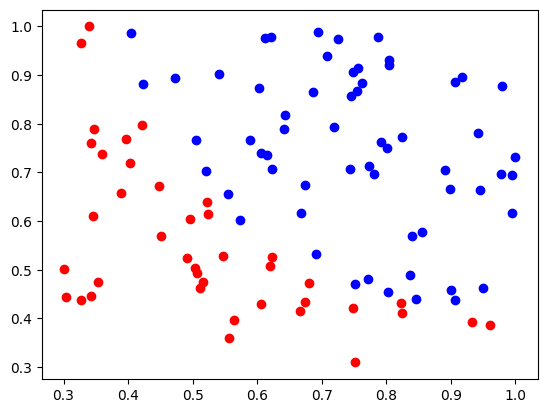

In [206]:
# 画出数据分布
# 用pyplot画出z值为1和0的点，那么首先就要筛选出z值不同的x,y数据;lambda匿名函数，输入x，输出x[-1]==0.0
x0 = list(filter(lambda x:x[-1] == 0.0,data))# 选择第一类的点
x1 = list(filter(lambda x:x[-1] == 1.0,data))# 选择第二类的点

plot_x0_0 = [i[0] for i in x0]
plot_x0_1 = [i[1] for i in x0]

plot_x1_0 = [i[0] for i in x1]
plot_x1_1 = [i[1] for i in x1]

plt.plot(plot_x0_0,plot_x0_1,'ro',label='x0')
plt.plot(plot_x1_0,plot_x1_1,'bo',label='x1')
plt.show()

In [189]:
# 将数据转换成 NumPy 的类型，接着转换到 Tensor 为之后的训练做准备
np_data = np.array(data, dtype='float32') # 转换成 numpy array
x_data = torch.from_numpy(np_data[:, 0:2]) # 转换成 Tensor, 大小是 [100, 2]
y_data = torch.from_numpy(np_data[:, -1]).unsqueeze(1) # 转换成 Tensor，大小是 [100, 1]

In [193]:
# 定义模型，损失函数，优化方法
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.lr = nn.Linear(2,1)
        self.sm = nn.Sigmoid()
    def forward(self,x):
        x = self.lr(x)
        x = self.sm(x)
        return x
    
logistic_model = LogisticRegression()
if torch.cuda.is_available():
    logistic_model.cuda()

# BCELoss()是二分类的损失函数
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(logistic_model.parameters(),lr = 1e-3, momentum=0.9)

for epoch in range(10):
    if torch.cuda.is_available():
        x = Variable(x_data).cuda()
        y = Variable(y_data).cuda()
    else:
        x = Variable(x_data)
        y = Variable(y_data)
    
    # forward
    out = logistic_model(x)
    loss = criterion(out,y)
    print_loss = loss.item()
    # 以0.5为阈值进行分类
    mask = out.ge(0.5).float()
    correct = (mask == y).sum()
    acc = correct.item()/x.size(0)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('*'*10)
    print('epoch {}'.format(epoch+1))
    print('loss is {}'.format(print_loss))
    print('acc is {}'.format(acc))

**********
epoch 1
loss is 0.6521297097206116
acc is 0.6
**********
epoch 2
loss is 0.6521146893501282
acc is 0.6
**********
epoch 3
loss is 0.652086079120636
acc is 0.6
**********
epoch 4
loss is 0.6520454287528992
acc is 0.6
**********
epoch 5
loss is 0.6519938707351685
acc is 0.6
**********
epoch 6
loss is 0.6519325375556946
acc is 0.6
**********
epoch 7
loss is 0.6518625020980835
acc is 0.6
**********
epoch 8
loss is 0.6517846584320068
acc is 0.6
**********
epoch 9
loss is 0.651699960231781
acc is 0.6
**********
epoch 10
loss is 0.6516091227531433
acc is 0.6


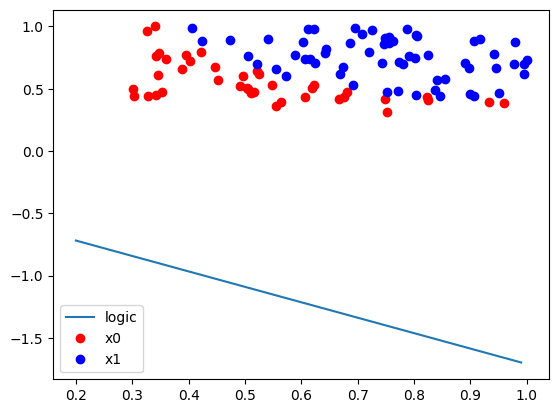

In [208]:
w0,w1 = logistic_model.lr.weight[0]
w0 = w0.item()
w1 = w1.item()
b = logistic_model.lr.bias.item()
plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x -b) / w1
plt.plot(plot_x,plot_y,label='logic')


plt.plot(plot_x0_0,plot_x0_1,'ro',label='x0')
plt.plot(plot_x1_0,plot_x1_1,'bo',label='x1')
# plt.show()
plt.legend(loc='best')
#只训练10个epoch，所以效果很差